In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u
import peakutils as pu
from scipy.signal import savgol_filter

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
filename2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/energyNotrace/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()
coll_tot=ca.NPYreader(filename2,False).get_event()

In [3]:
coll1=coll.subset('ae',0,1.6e-2)
curr1=coll1.get_curr()
trace1=coll1.get_traces()
coll2=coll.subset('ae',1.90e-2,1.95e-2)
trace2=coll2.get_traces()
curr2=coll2.get_curr()

<IPython.core.display.Javascript object>


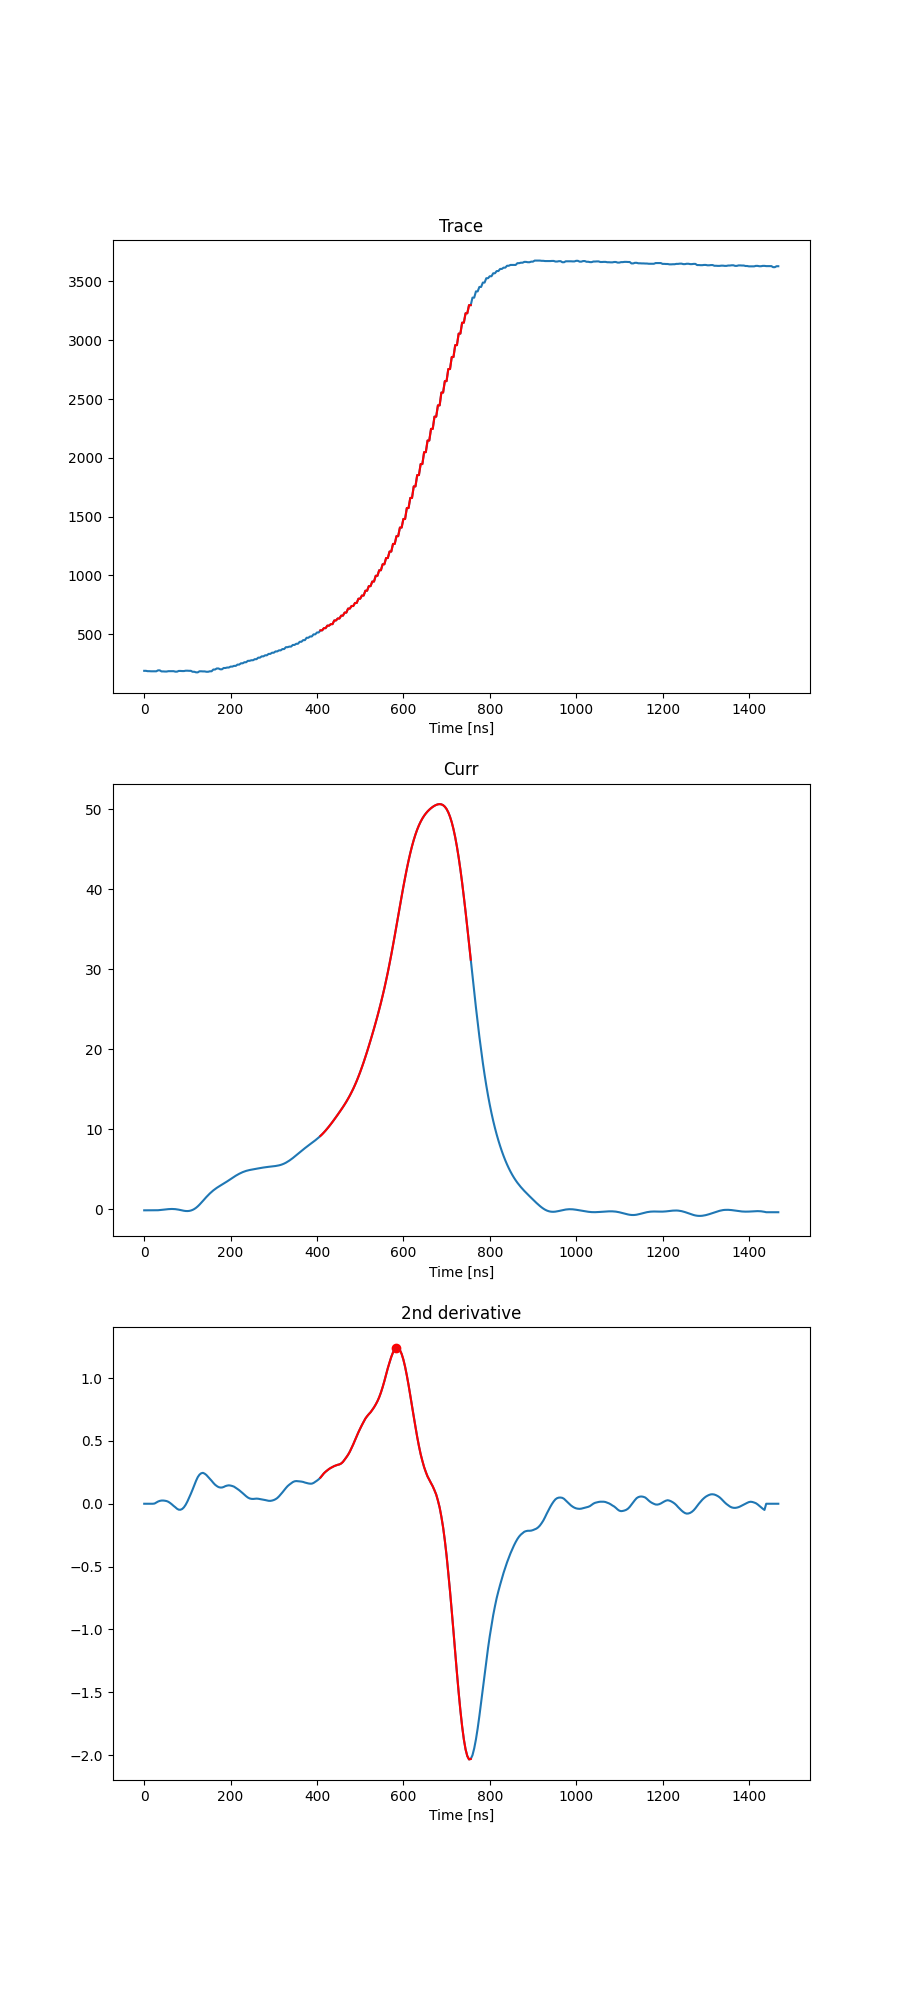

In [4]:
from begepro.dspro import utils as u
from scipy.signal import find_peaks

nd_der_obj=u.second_derivative()
rtobj=u.rise_time()
peaks_obj=u.n_peaks()

i=6
c,f=nd_der_obj.compute_der(curr1[i])
time=np.arange(0,len(c),1)*4
fig,axs=plt.subplots(3,figsize=(9,20))
axs[0].plot(time,trace1[i])
axs[0].set_title('Trace')
axs[1].plot(time,c)
axs[1].set_title('Curr')
axs[2].plot(time,f)
axs[2].set_title('2nd derivative')


#axs[0].set(xlabel='Time [ns]',ylabel='ADC Channel')
#axs[1].set(xlabel='Time [ns]',ylabel='ADC Channel')
#axs[2].set(xlabel='Time [ns]',ylabel='ADC Channel')

axs[0].set(xlabel='Time [ns]')
axs[1].set(xlabel='Time [ns]')
axs[2].set(xlabel='Time [ns]')

rt,t=rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[t[0] : t[1]]*4,trace1[i][t[0] : t[1]],color='r')
axs[1].plot(x[t[0] : t[1]]*4,c[t[0] : t[1]],color='r')
axs[2].plot(x[t[0] : t[1]]*4,f[t[0] : t[1]],color='r')
plt.show()


#indexes=peaks_obj.compute_n_peaks(f,coll1.get_energies()[i],750,7)
indexes=find_peaks(f[t[0] : t[1]],prominence=0.1,distance=10)[0]+t[0]

axs[2].scatter(indexes*4,f[indexes],marker='o',color='r')

plt.show()

203582


<IPython.core.display.Javascript object>


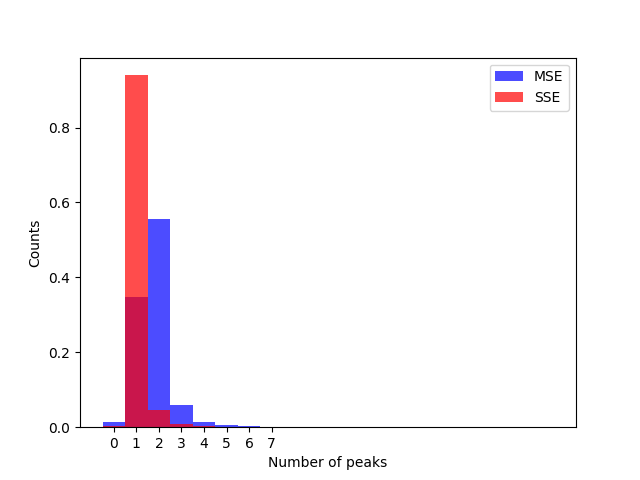

<IPython.core.display.Javascript object>


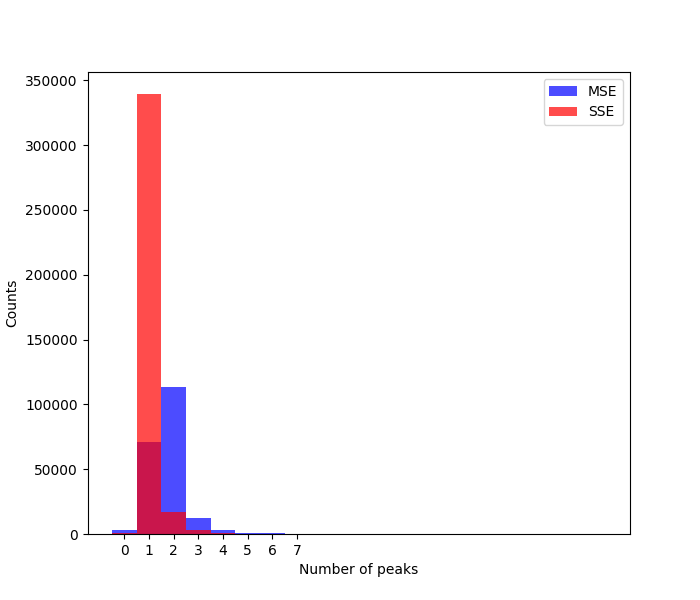

[2.82000e+03 7.07740e+04 1.13407e+05 1.21670e+04 2.77900e+03 1.03000e+03
 3.91000e+02 1.36000e+02 4.70000e+01 2.00000e+01 8.00000e+00 2.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00]


In [5]:
#Distribution of the events
n1=coll_tot.subset('ae',0,1.6e-2).get_n_peaks_2der()
print(n1.size)
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_n_peaks_2der()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
plt.hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
plt.xticks(range(8))
plt.legend()

plt.xlabel('Number of peaks',loc='center')
plt.ylabel('Counts',loc='center')

#without normalization

n1=coll_tot.subset('ae',0,1.6e-2).get_n_peaks_2der()
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_n_peaks_2der()
plt.figure(figsize=(7,6))
bins=np.linspace(0,20,21)
c1=plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE',align='left')
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE',align='left')
plt.xticks(range(8))
plt.legend()
plt.xlabel('Number of peaks',loc='center')
plt.ylabel('Counts',loc='center')

print(c1[0])

36
2


<IPython.core.display.Javascript object>


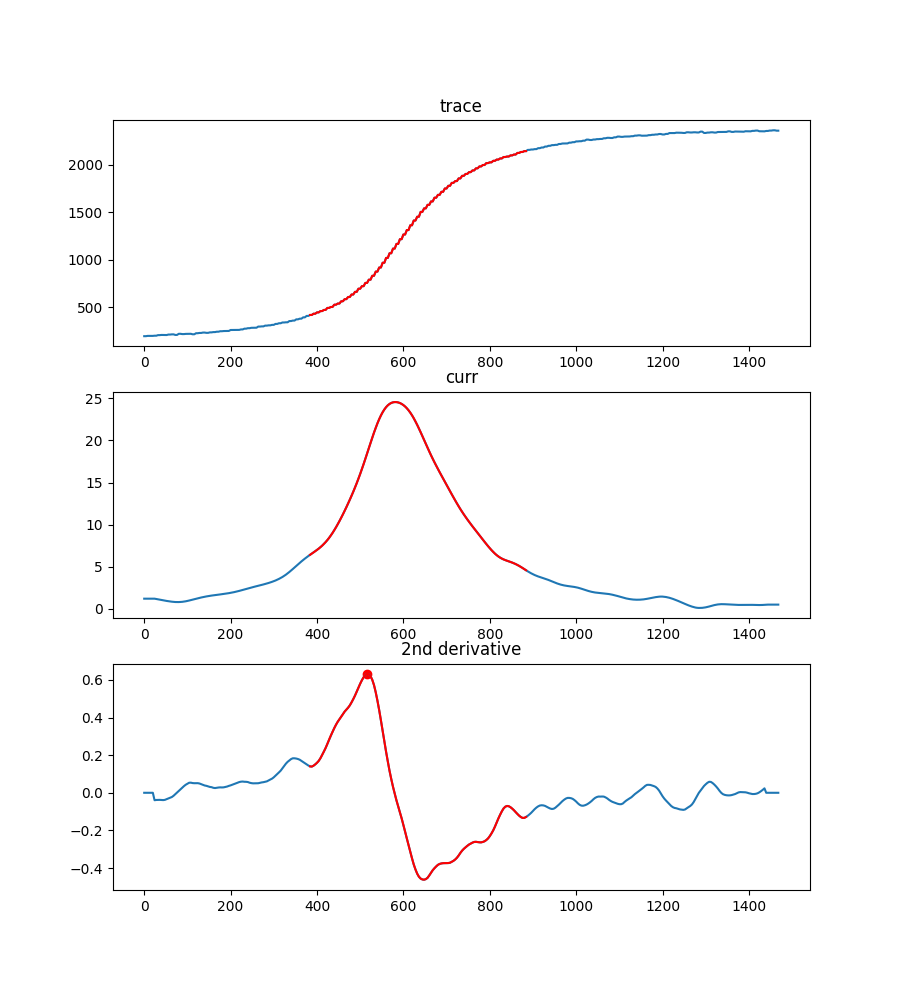

In [6]:
from begepro.dspro import utils as u
i=2
trace=coll1.subset('n_peaks_2der',cutmin=1,cutmax=1).get_traces()
curr=coll1.subset('n_peaks_2der',cutmin=1,cutmax=1).get_curr()

print(coll1.subset('n_peaks_2der',cutmin=1,cutmax=1).get_indexes()[i])
print(coll.get_n_peaks_2der()[22])

c,f=nd_der_obj.compute_der(curr[i])
fig,axs=plt.subplots(3,figsize=(9,10))
axs[0].plot(time,trace[i])
axs[0].set_title('trace')
axs[1].plot(time,c)
axs[1].set_title('curr')
axs[2].plot(time,f)
axs[2].set_title('2nd derivative')
plt.show()

rtobj=u.rise_time()
rt,t=rtobj.compute_rt(trace[i],4e-9)

x=np.arange(0,len(trace[i]),1)
axs[0].plot(x[t[0] : t[1]]*4,trace[i][t[0] : t[1]],color='r')
axs[1].plot(x[t[0] : t[1]]*4,c[t[0] : t[1]],color='r')
axs[2].plot(x[t[0] : t[1]]*4,f[t[0] : t[1]],color='r')
plt.show()

indexes=nd_der_obj.compute_n_peaks(f,t)

axs[2].scatter(indexes*4,f[indexes],marker='o',color='r')

<IPython.core.display.Javascript object>


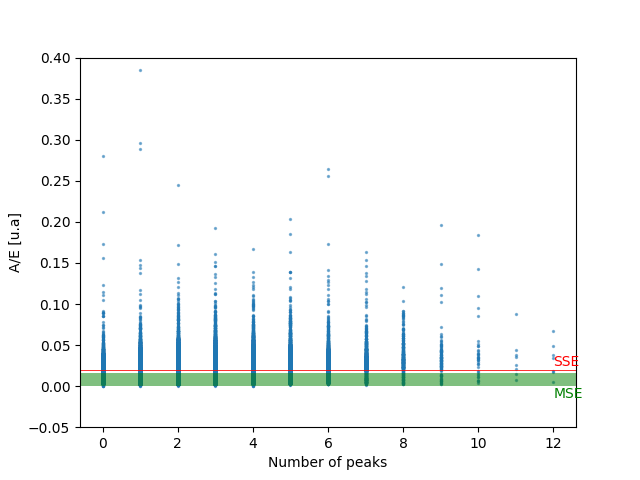

In [9]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_n_peaks_2der(),coll_tot.get_avse(),s=2,alpha=0.5)
plt.show()

plt.xlabel('Number of peaks')
plt.ylabel('A/E [u.a]')
plt.ylim(-0.05,0.4)

plt.annotate('MSE',(12,-0.015),color='g')
plt.annotate('SSE',(12,0.025),color='r')
plt.axhspan(0,1.6e-2,facecolor='g',alpha=0.5)
plt.axhspan(1.90e-2,1.95e-2,facecolor='r',alpha=0.8)